### 结果可视化
用于将检索结果进行可视化，通过读取结果文档`./results/logs/result.log`分析检索结果与文章类别的关系
1. 绘制词云表面检索结果中出现的文章类别及其频率
2. 计算前K个结果中最常见的文章类别的占比（expertise专业性）
3. 计算后续结果中不同文章类别的分布（diversity多样性）作为评价指标

In [32]:
import pandas as pd
import os

from matplotlib import pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import numpy as np
import math

df = pd.read_csv("./data/all_news.csv")
classes = ["business", "entertainment", "politics", "sport", "tech"]


In [35]:
def cal_exp_score(result):
    max_label = max(result, key=result.count)
    max_count = result.count(max_label)

    return max_count / len(result)

def cal_div_score(result):
    max_idx = 0
    cls_cnt = 0
    for i in classes:
        if i not in result:
            max_idx = len(result)
        else:
            cls_cnt += 1
            idx = result.index(i)
            max_idx = max(max_idx, idx)
    return cls_cnt/max_idx


def ciyun(wordlist, terms, sim_word, mode):
    space_list = ' '.join(wordlist)
    topk = min(50, len(wordlist)//2)
    exp_score = round(cal_exp_score(wordlist[:topk]), 4)
    div_score = round((cal_div_score(wordlist))**0.3, 4)

    wc = WordCloud(width=800, height=800,
                   background_color='white',
                   mode='RGB',
                   max_words=500,
                   max_font_size=200,
                   relative_scaling=0.6,
                   random_state=50,
                   scale=2
                   ).generate(space_list)

    if mode == 1:
        plt.text(0, 0, "terms: {}\nsim words: {}\ntop{} expertise score:{}, diverse score:{}".format(
            ", ".join(terms), ", ".join(sim_word), topk, exp_score, div_score))
    else:
        plt.text(0, 0, "terms: {}\ntop{} expertise score:{}, diverse score:{}".format(
            ", ".join(terms), topk, exp_score, div_score))

    plt.imshow(wc)
    plt.axis('off')
    plt.savefig('./results/visualize/{}_{}.jpg'.format(mode, "_".join(terms)))
    plt.show()


['time', 'math']
[]


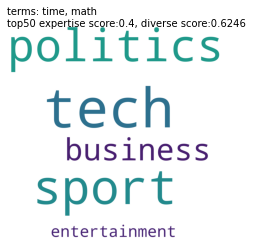

['math', 'technology']
[]


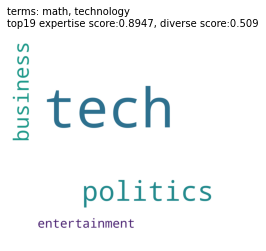

['speech', 'politics', 'rule']
[]


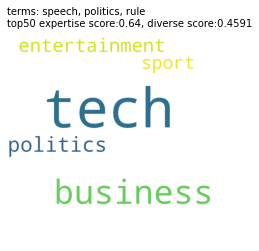

['music', 'basketball']
[]


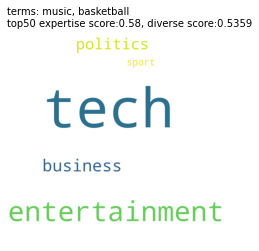

['horse', 'economy']
[]


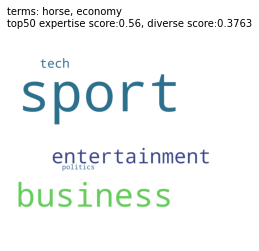

['economy']
[]


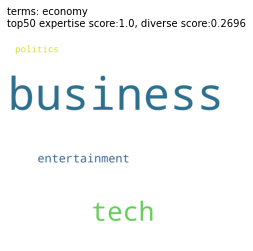

['time']
['but', 'when', 'day', 'out', 'an']


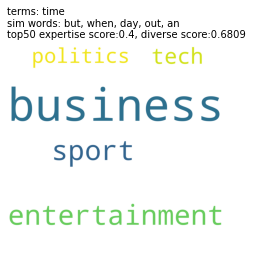

['search']
['tool', 'ask', 'web', 'engine', 'google']


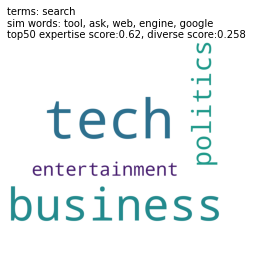

['paper', 'research']
[]


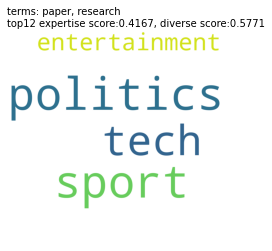

['family']
[]


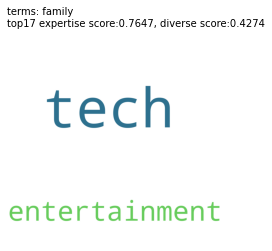

['school', 'education']
[]


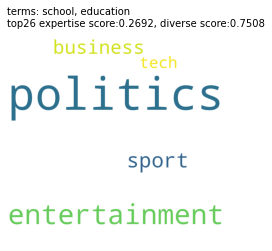

['people']
[]


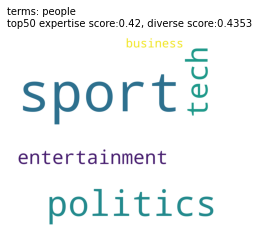

['economy']
[]


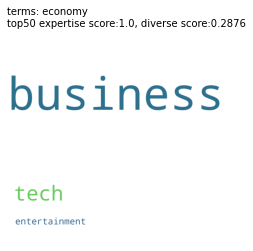

['math', 'technology']
[]


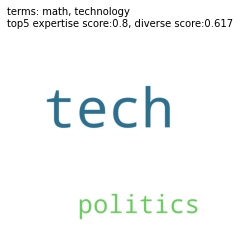

['math', 'technology']
[]


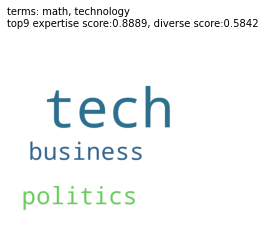

In [36]:
logpath = "./results/logs/result.log"
dirs = "./results"
if not os.path.exists(dirs):
    os.mkdir(dirs)
if not os.path.exists("./results/visualize"):
    os.mkdir("./results/visualize")

with open(logpath, "r") as f:
    line = f.readline()
    while line:
        idx = line.find("mode: ")
        mode = int(line[idx+6])

        idx_1 = line.find("receive terms [")
        idx_2 = line.find("], search")
        terms_str = line[idx_1+15:idx_2]
        terms = list(map(lambda x: x[1:-1], terms_str.split(", ")))
        print(terms)

        idx_1 = line.find("search terms [")
        idx_2 = line.find("], return")
        sim_str = line[idx_1+14:idx_2]
        sim_word = list(map(lambda x: x[1:-1], sim_str.split(", ")))
        sim_word = list(set(sim_word).difference(set(terms)))
        print(sim_word)

        idx = line.find("documents [")
        documents_str = line[idx+11:-2]
        documents = list(map(lambda x:int(x)-1, documents_str.split(", ")))

        ciyun(list(df["topic"][documents]), terms=terms, sim_word=sim_word, mode=mode)

        line = f.readline()
